In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
column_names=['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name']
df=pd.read_csv('auto-mpg.data.txt',delim_whitespace=True,names=column_names)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [28]:
# mpg (miles per gallon) is the attribute which needs to be predicted

# since the target attribute (mpg) is continuous we would be using regression for the prediction task........

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [30]:
df.shape

(398, 9)

In [31]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [32]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [33]:
# Summary of Statistics

df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [34]:
df.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [35]:
df.mpg.value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64

In [ ]:
Key Observations: 
    
    Target/Dependent variable has continuous values
    

# Data Visualisation

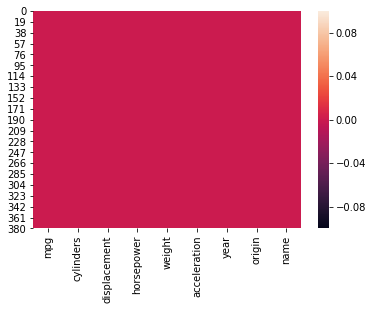

In [36]:
sns.heatmap(df.isnull())

In [37]:
# Now let's check the null values without using visualisation
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [39]:
# Horsepower and name columns have string/object datatype which needs to be converted to integer/numerical

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()
# df['Region']=le.fit_transform(df['Region])

list1=['horsepower','name']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

# Checking out the correlation

In [61]:
dfcor=df.corr()
dfcor

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
mpg,1.000000,-0.775396,-0.804203,0.451767,-0.831741,0.420289,0.579267,0.563450,0.273936
cylinders,-0.775396,1.000000,0.950721,-0.575603,0.896017,-0.505419,-0.348746,-0.562543,-0.275754
displacement,-0.804203,0.950721,1.000000,-0.511171,0.932824,-0.543684,-0.370164,-0.609409,-0.292064
horsepower,0.451767,-0.575603,-0.511171,1.000000,-0.510286,0.288633,0.146147,0.286848,0.174172
weight,-0.831741,0.896017,0.932824,-0.510286,1.000000,-0.417457,-0.306564,-0.581024,-0.255247
acceleration,0.420289,-0.505419,-0.543684,0.288633,-0.417457,1.000000,0.288137,0.205873,0.128285
year,0.579267,-0.348746,-0.370164,0.146147,-0.306564,0.288137,1.000000,0.180662,0.074761
origin,0.563450,-0.562543,-0.609409,0.286848,-0.581024,0.205873,0.180662,1.000000,0.360058
name,0.273936,-0.275754,-0.292064,0.174172,-0.255247,0.128285,0.074761,0.360058,1.000000


In [ ]:
# Observations: 

# mpg is positively correlated with horsepower,acceleration, year & origin

# mpg is negatively correlated with the number of cylinders, displacement & weight

# name has little impact on mpg 

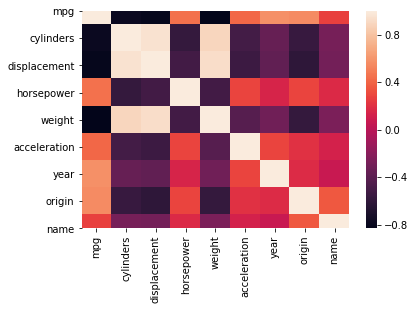

In [62]:
sns.heatmap(dfcor)

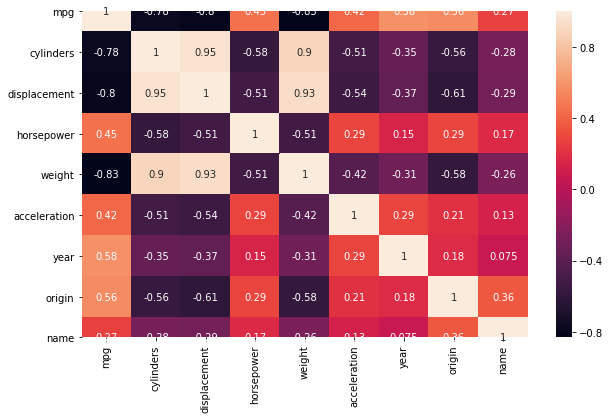

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True)

In [42]:
# there are no null values but the auto-mpg.names file says that horsepower has 6 missing values.

# lets treat those missing values


from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='mean')
df['horsepower']=imp.fit_transform(df['horsepower'].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,15.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,33.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,27.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,27.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,22.0,3449.0,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,80.0,2790.0,15.6,82,1,153
394,44.0,4,97.0,51.0,2130.0,24.6,82,2,301
395,32.0,4,135.0,78.0,2295.0,11.6,82,1,119
396,28.0,4,120.0,73.0,2625.0,18.6,82,1,159


In [44]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name              int32
dtype: object

# Plotting the outliers

mpg                AxesSubplot(0.125,0.536818;0.0945122x0.343182)
cylinders       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
displacement    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
horsepower      AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
weight          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
acceleration    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
year            AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
origin                AxesSubplot(0.125,0.125;0.0945122x0.343182)
name               AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

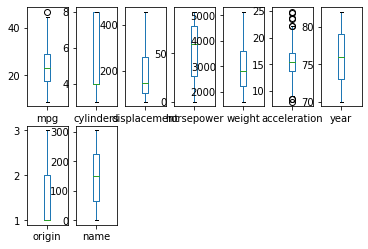

In [45]:
df.plot(kind='box',subplots=True, layout=(2,7))

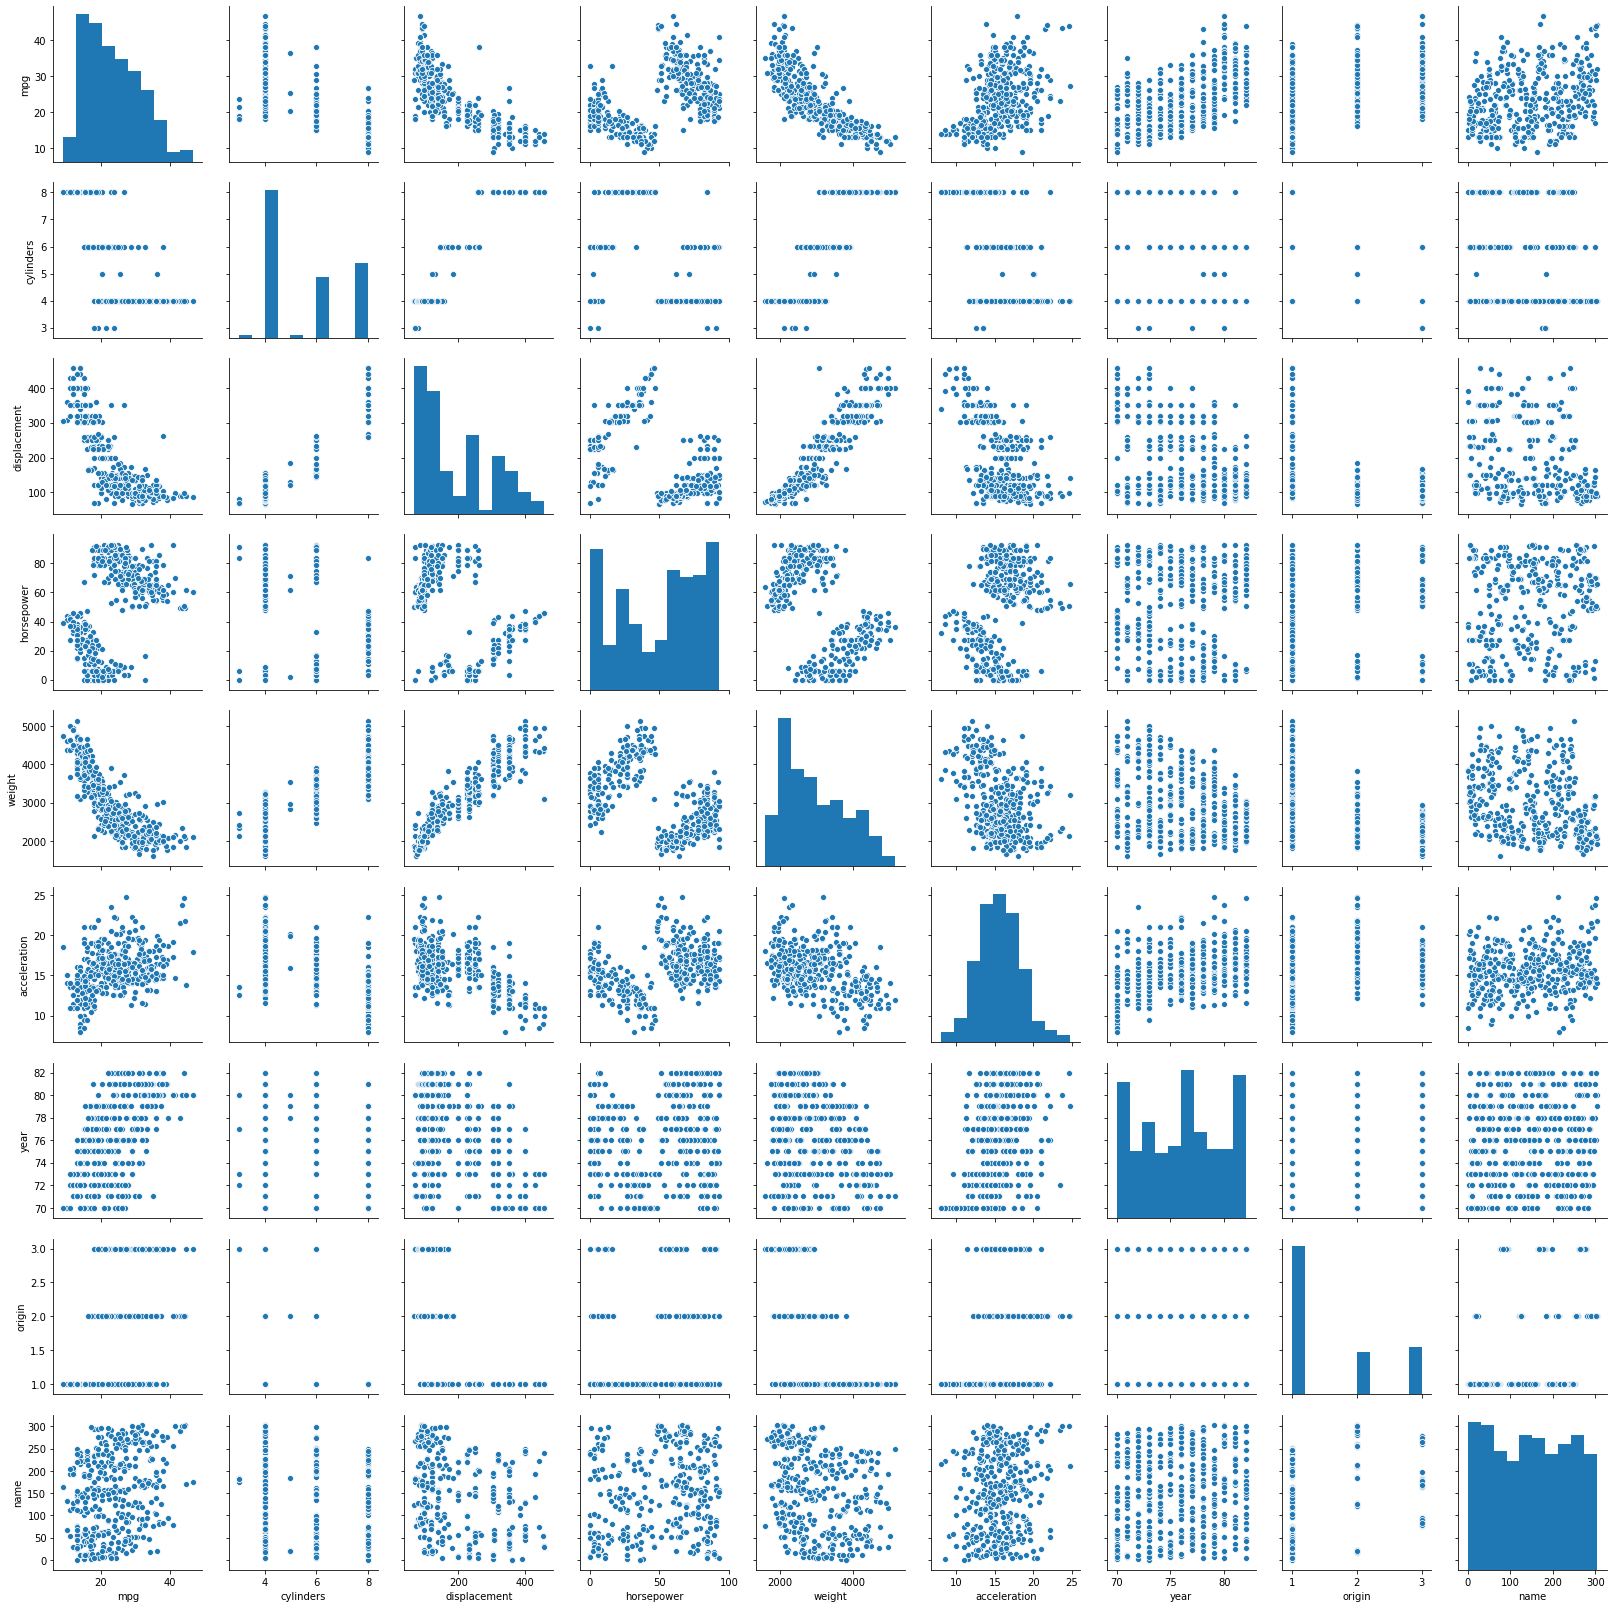

In [64]:
sns.pairplot(df)

# Bivariate Analysis

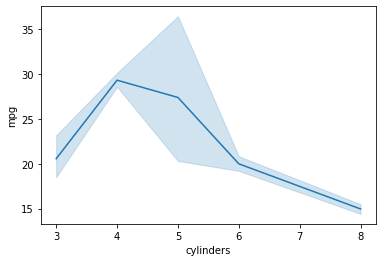

In [65]:
# cylinders vs mpg

sns.lineplot(x=df['cylinders'],y=df['mpg'],data=df)
plt.show()

# maximum mileage is given by cars with 4 cylinders

# If a vehicle has more than 4 cylinders the mpg (miles per gallon) or the mileage decreases

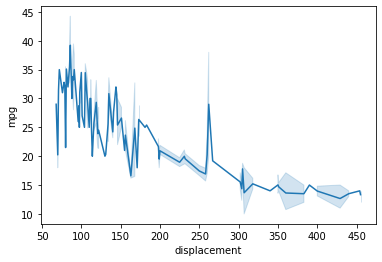

In [97]:
# displacement vs mpg

sns.lineplot(x=df['displacement'],y=df['mpg'],data=df)
plt.show()

# As the engine size(cc) or displacement increases the mileage or miles per gallon (mpg) decreases

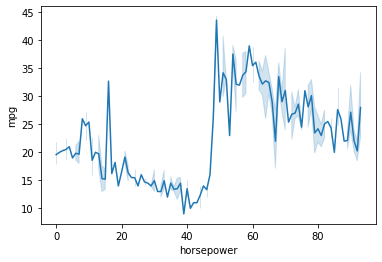

In [98]:
# horsepower vs mpg

sns.lineplot(x=df['horsepower'],y=df['mpg'],data=df)
plt.show()

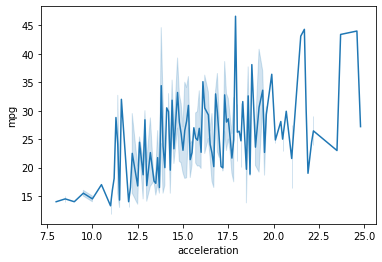

In [99]:
# acceleration vs mpg

sns.lineplot(x=df['acceleration'],y=df['mpg'],data=df)
plt.show()

# Medium levels of acceleration (15-22.5) are required for the best mileage or mpg

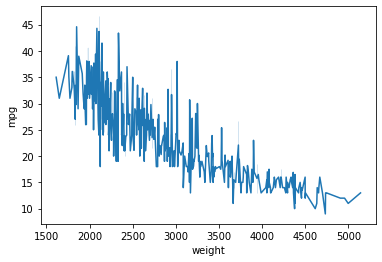

In [100]:
# weight vs mpg 

sns.lineplot(x=df['weight'],y=df['mpg'],data=df)
plt.show()

# As the weight of the automobile increases the mileage or mpg (miles per gallon) decreases


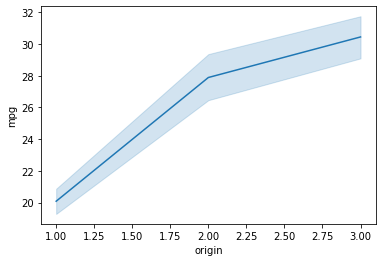

In [101]:
# origin vs mpg 

sns.lineplot(x=df['origin'],y=df['mpg'],data=df)
plt.show()

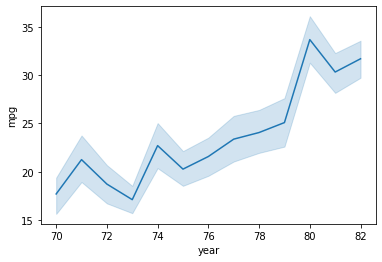

In [102]:
# year vs mpg 

sns.lineplot(x=df['year'],y=df['mpg'],data=df)
plt.show()

# Newer automobiles or vehicles give better mileage or mpg 

In [ ]:
# Observations:

# maximum mileage is given by cars with 4 cylinders

# If a vehicle has more than 4 cylinders the mpg (miles per gallon) or the mileage decreases

# As the engine size(cc) or displacement increases the mileage or miles per gallon (mpg) decreases

# Medium levels of acceleration (15-22.5) are required for the best mileage or mpg

# As the weight of the automobile increases the mileage or mpg (miles per gallon) decreases

# Newer automobiles or vehicles give better mileage or mpg 



# To check the distribution of skewness

In [46]:
collist=df.columns.values
ncol=12
nrows=10

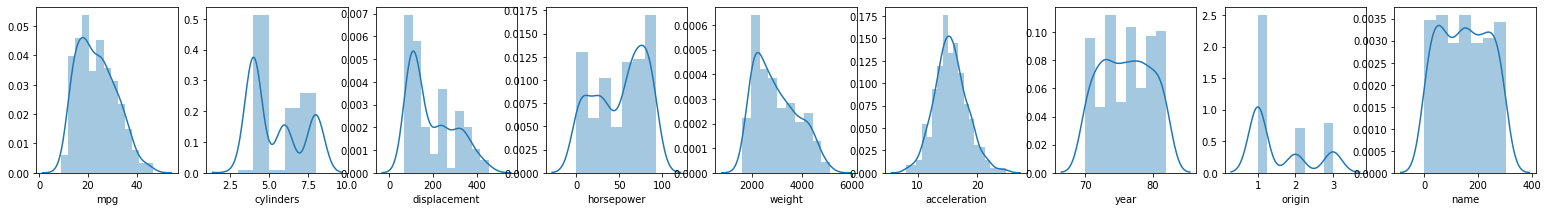

In [47]:
plt.figure(figsize=(36,36))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [48]:
# Removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.7064387 , 1.49819126, 1.0906037 , ..., 1.62742629, 0.71514478,
        1.11374457],
       [1.09075062, 1.49819126, 1.5035143 , ..., 1.62742629, 0.71514478,
        1.25918548],
       [0.7064387 , 1.49819126, 1.19623199, ..., 1.62742629, 0.71514478,
        0.92242821],
       ...,
       [1.08701694, 0.85632057, 0.56103873, ..., 1.62198339, 0.71514478,
        0.33060119],
       [0.57460104, 0.85632057, 0.70507731, ..., 1.62198339, 0.71514478,
        0.11690931],
       [0.95891297, 0.85632057, 0.71467988, ..., 1.62198339, 0.71514478,
        0.88998932]])

In [49]:
threshold=3
print(np.where(z>3))

(array([299, 394], dtype=int64), array([5, 5], dtype=int64))


In [50]:
df_new=df[(z<3).all(axis=1)]
df_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,15.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,33.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,27.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,27.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,22.0,3449.0,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,84.0,2950.0,17.3,82,1,43
393,27.0,4,140.0,80.0,2790.0,15.6,82,1,153
395,32.0,4,135.0,78.0,2295.0,11.6,82,1,119
396,28.0,4,120.0,73.0,2625.0,18.6,82,1,159


In [51]:
df.shape

(398, 9)

In [52]:
df_new.shape

(396, 9)

In [53]:
# Lets check the skewness of the dataset
df_new.skew()

mpg             0.445176
cylinders       0.518701
displacement    0.712349
horsepower     -0.312546
weight          0.528711
acceleration    0.154848
year            0.017950
origin          0.930789
name            0.023663
dtype: float64

In [54]:
# there is some skewness which needs to be treated

In [55]:
# Treating using log

for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [56]:
# lets again check the skewness
df_new.skew()

mpg             0.445176
cylinders       0.518701
displacement    0.221856
horsepower     -0.312546
weight          0.528711
acceleration    0.154848
year            0.017950
origin          0.806283
name            0.023663
dtype: float64

In [57]:
# Skewness has been reduced

In [ ]:
# Data Cleansing:

# Removing the missing values

# Dropping the negatively correlated columns

# Removing the outliers

In [72]:
# Removing the unncessary columns

# car name is not at all important. Factors to be considered while predicting the mpg (miles per gallon) are:

# cylinders, displacement, horsepower, acceleration, weight, origin and year

df_new.drop('name',axis=1,inplace=True)

In [74]:
# Separating the target and input values

df_x=df_new.drop(columns=['mpg'])
y=df_new[['mpg']]

In [75]:
# Scaling the input variable
# linear regression algorithm requires all features to be on a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [76]:
# Lets again check the skewness
x.skew()

cylinders       0.518701
displacement    0.221856
horsepower     -0.312546
weight          0.528711
acceleration    0.154848
year            0.017950
origin          0.806283
dtype: float64

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to:',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
            
    print('Maximum r2 score corresponding to:',final_r_state,'is:',max_r_score)
    return final_r_state

In [78]:
# Lets use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)


r2 score corresponding to: 42 is 0.8044826836054653
r2 score corresponding to: 43 is 0.7907128254207441
r2 score corresponding to: 44 is 0.8186561767144771
r2 score corresponding to: 45 is 0.8224607453334716
r2 score corresponding to: 46 is 0.7961667728475454
r2 score corresponding to: 47 is 0.8166196411421982
r2 score corresponding to: 48 is 0.8192119670880706
r2 score corresponding to: 49 is 0.8445224117879769
r2 score corresponding to: 50 is 0.8200459836832369
r2 score corresponding to: 51 is 0.8460712746450418
r2 score corresponding to: 52 is 0.8497235680189851
r2 score corresponding to: 53 is 0.8616077142880171
r2 score corresponding to: 54 is 0.8047591880456009
r2 score corresponding to: 55 is 0.8468344163351971
r2 score corresponding to: 56 is 0.8364688518215839
r2 score corresponding to: 57 is 0.7769464918139648
r2 score corresponding to: 58 is 0.8642864888914086
r2 score corresponding to: 59 is 0.8038242981498644
r2 score corresponding to: 60 is 0.7268407791902114
r2 score cor

In [79]:
# Lets use grid_search to find the optimal value of n_neighbors for KNN  model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 9}

In [80]:
# Lets use KNN regression and check maximum r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to: 42 is 0.8294209248383387
r2 score corresponding to: 43 is 0.8127940009362761
r2 score corresponding to: 44 is 0.8661771141117731
r2 score corresponding to: 45 is 0.8065955080929874
r2 score corresponding to: 46 is 0.8463983746666828
r2 score corresponding to: 47 is 0.8622774078342179
r2 score corresponding to: 48 is 0.8245617542378664
r2 score corresponding to: 49 is 0.8835981122163196
r2 score corresponding to: 50 is 0.8272406547908551
r2 score corresponding to: 51 is 0.889794123273372
r2 score corresponding to: 52 is 0.8347745642416096
r2 score corresponding to: 53 is 0.8903829157108377
r2 score corresponding to: 54 is 0.8588196877202214
r2 score corresponding to: 55 is 0.870210174208747
r2 score corresponding to: 56 is 0.899108394893042
r2 score corresponding to: 57 is 0.8161853450327184
r2 score corresponding to: 58 is 0.8495203748969357
r2 score corresponding to: 59 is 0.809351034331198
r2 score corresponding to: 60 is 0.7807481676197228
r2 score corresp

In [81]:
# Lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression: ', cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())


Mean r2 score for linear regression:  0.5990982975013012
Standard deviation in r2 score for Linear Regression: 0.2271967271579302

Mean r2 score for KNN Regression: 0.6888619123405484
Standard deviation in r2 score for KNN Regression: 0.2335655232022244


In [82]:
# Lets check Lasso Regression and the best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.1}

In [83]:
# Lets check the maximum r2 score when we use Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to: 42 is 0.7995007210212782
r2 score corresponding to: 43 is 0.7874553575889144
r2 score corresponding to: 44 is 0.8270387771395162
r2 score corresponding to: 45 is 0.815235702440934
r2 score corresponding to: 46 is 0.7939189597983624
r2 score corresponding to: 47 is 0.810839718009633
r2 score corresponding to: 48 is 0.806679758421323
r2 score corresponding to: 49 is 0.8529800547397061
r2 score corresponding to: 50 is 0.8115729188960272
r2 score corresponding to: 51 is 0.8400914076852
r2 score corresponding to: 52 is 0.8545560100702241
r2 score corresponding to: 53 is 0.8652867642374378
r2 score corresponding to: 54 is 0.7923231070564551
r2 score corresponding to: 55 is 0.8463799860241668
r2 score corresponding to: 56 is 0.831288984800717
r2 score corresponding to: 57 is 0.7803358318559073
r2 score corresponding to: 58 is 0.8546709824056059
r2 score corresponding to: 59 is 0.8035502527860157
r2 score corresponding to: 60 is 0.736820179533061
r2 score correspondi

In [84]:
# Lets use the cross val score with Lasso

print('Mean r2 score for Lasso regression: ', cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Lasso Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

# Based on the below output one can say that Lasso performed just like Linear Regression


Mean r2 score for Lasso regression:  0.6004796272649149
Standard deviation in r2 score for Lasso Regression: 0.2271967271579302


In [85]:
# Now we will try to use the gradient boosting technique

# For getting the best set of parameters we will use grid search

from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [86]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to: 42 is 0.8679408669092045
r2 score corresponding to: 43 is 0.8394863675451928
r2 score corresponding to: 44 is 0.8631776552398993
r2 score corresponding to: 45 is 0.810713119265913
r2 score corresponding to: 46 is 0.828109596968559
r2 score corresponding to: 47 is 0.8217476975690623
r2 score corresponding to: 48 is 0.8545442208516327
r2 score corresponding to: 49 is 0.9007924060408813
r2 score corresponding to: 50 is 0.8077356237409273
r2 score corresponding to: 51 is 0.8938566692869561
r2 score corresponding to: 52 is 0.8991396324026912
r2 score corresponding to: 53 is 0.9087429899108894
r2 score corresponding to: 54 is 0.8882414885912001
r2 score corresponding to: 55 is 0.8977766502425278
r2 score corresponding to: 56 is 0.8974553242895962
r2 score corresponding to: 57 is 0.8218776496526732
r2 score corresponding to: 58 is 0.8912140839072751
r2 score corresponding to: 59 is 0.830577659262973
r2 score corresponding to: 60 is 0.853340602407608
r2 score corresp

In [87]:
# Now we will use the cross_val_score to check the mean r2 score and standard deviation

print('Mean r2 score for Gradient boosting regression: ', cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Gradient boosting regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())



Mean r2 score for Gradient boosting regression:  0.7649146560115151
Standard deviation in r2 score for Gradient boosting regression: 0.1701643376016377


In [88]:
# Now lets use adaboost regression algorithm

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [89]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to: 42 is 0.9007035005055931
r2 score corresponding to: 43 is 0.8335957649576013
r2 score corresponding to: 44 is 0.8643894218190312
r2 score corresponding to: 45 is 0.8181758648196276
r2 score corresponding to: 46 is 0.8214736931094333
r2 score corresponding to: 47 is 0.8102131252373055
r2 score corresponding to: 48 is 0.8525393169592115
r2 score corresponding to: 49 is 0.8662361009994262
r2 score corresponding to: 50 is 0.7616110889450749
r2 score corresponding to: 51 is 0.8562314343076572
r2 score corresponding to: 52 is 0.8844744143666421
r2 score corresponding to: 53 is 0.89433136729838
r2 score corresponding to: 54 is 0.8894097711581512
r2 score corresponding to: 55 is 0.8993246598426639
r2 score corresponding to: 56 is 0.8940559756327131
r2 score corresponding to: 57 is 0.8389355047153914
r2 score corresponding to: 58 is 0.9017835029201213
r2 score corresponding to: 59 is 0.8318007219559067
r2 score corresponding to: 60 is 0.8639717313413885
r2 score corre

In [90]:
# Now we will use the cross_val_score to check the mean r2 score and standard deviation

print('Mean r2 score for Ada Boost regression: ', cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Ada Boost regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())


Mean r2 score for Ada Boost regression:  0.7278155666835746
Standard deviation in r2 score for Ada Boost regression: 0.20202477456941056


In [91]:
# We tried all the models and found that Gradient boosting regressor is the best
# Random state corresponding to highest r2 score is 94

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [92]:
# Lets find the rmse and r2 score using sklearn.metrics

import numpy as np

print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score is:',r2_score(y_test,y_pred))

RMSE is: 2.064614685225274
r2 score is: 0.9196296968786388


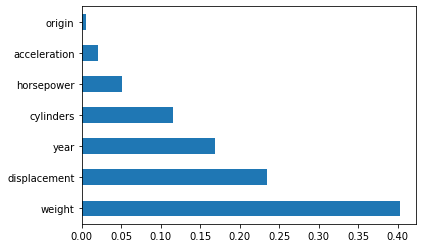

In [96]:
feat_importances = pd.Series(gbr.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [ ]:
# factors or attributes which contribute the most towards mpg(miles per gallon) in descending order are: 

# 1) Weight 
# 2) Displacement
# 3) Year 
# 4) Cylinders
# 5) horsepower
# 6) acceleration
# 7) origin

In [93]:
from sklearn.externals import joblib

# Save the model as a pickle in a file

joblib.dump(gbr,'mpg.obj')

['mpg.obj']

In [94]:
# load the model from the file

gbr_from_joblib=joblib.load('mpg.obj')

# Use the loaded model to make predictions

gbr_from_joblib.predict(x_test)

array([16.83194225, 34.46432392, 19.33156493, 19.30804511, 15.71427604,
       13.83274499, 23.64380974, 26.98941577, 17.93381286, 18.27232713,
       37.66209188, 29.45228017, 13.6848963 , 24.89653752, 27.09336526,
       24.66944202, 35.50681707, 30.19062187, 24.63965101, 33.22637019,
       14.170803  , 19.31487782, 31.55946037, 13.89293095, 15.24242252,
       15.4252675 , 23.5187723 , 25.27510309, 12.87978915, 30.01158951,
       24.5406055 , 30.60550021, 15.03566995, 14.00451738, 24.7930237 ,
       17.93381286, 12.9844368 , 16.71601293, 17.64956795, 33.63977809,
       20.45602614, 35.23992036, 18.90848462, 35.84276578, 12.80036008,
       35.42469958, 34.72058998, 15.56159601, 20.57187805, 35.07513991,
       19.99432555, 21.447111  , 29.56512044, 24.57637713, 14.170803  ,
       36.11157333, 29.91974726, 27.09108779, 13.53052947, 12.82487067,
       25.52271831, 12.97213044, 27.62412578, 17.14736253, 28.0028477 ,
       18.01368765, 26.58084249, 17.56447655, 28.15812954, 28.63